In [5]:
#!pip install ipywidgets

In [6]:
#!jupyter nbextension enable --py widgetsnbextension

In [3]:
%matplotlib inline
from ipywidgets import interactive

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

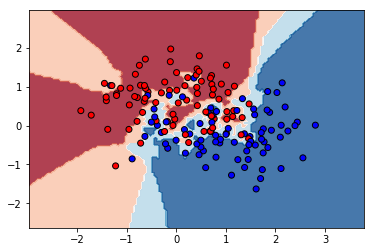

In [4]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
     "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
     "Naive Bayes", "SGDClassifier"]
def f(datasets, shape,weights,classifier,data):

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1, max_iter=1000),
        AdaBoostClassifier(),
        GaussianNB(),
        SGDClassifier()]
    
    LX, Ly = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2, weights=[weights,1-weights])
    rng = np.random.RandomState(2)
    LX += shape * rng.uniform(size=LX.shape)
    linearly_separable = (LX, Ly)

    datasets_dict = {'moon': make_moons(n_samples=200, noise=shape/2, random_state=0),
                'circle': make_circles(n_samples=200, noise=shape/2, factor=0.5, random_state=1),
                'linear': linearly_separable}
    
    X = datasets_dict[datasets][0]
    y = datasets_dict[datasets][1]
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05)) 

    clf = classifiers[names.index(classifier)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    # Plot also the training points
    if data == 'train':
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    elif data == 'test':
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', alpha=0.1)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k')
#     plt.scatter(datasets[2][0][:, 0], datasets[2][0][:, 1], marker='o', c=datasets[2][1], cmap=cm_bright, edgecolor='k')
#     plt.show()
    
interactive_plot = interactive(f, datasets=['moon', 'circle', 'linear'], shape=(0, 3, 0.1), weights=(0.05,0.99,0.05), 
                               classifier=names, data=['train', 'test'])
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot